# Определение стоимости автомобилей

Цель проекта: предоставить модель машинного обучения для определения стоимости б\у автомобиля. В качестве метрики качества выбрать RSME. Наилучшую модель выбрать исходя из качества предсказания, скорости обучения и время обучения.

Порядок работы представлен ниже

<h1>Порядок работы<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Отберем-значимые-и-незначимые-признаки" data-toc-modified-id="Отберем-значимые-и-незначимые-признаки-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Отберем значимые и незначимые признаки</a></span></li><li><span><a href="#Дублирующие-значения" data-toc-modified-id="Дублирующие-значения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Дублирующие значения</a></span></li><li><span><a href="#Обработка-нулей" data-toc-modified-id="Обработка-нулей-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Обработка нулей</a></span></li><li><span><a href="#обработка-пропусков" data-toc-modified-id="обработка-пропусков-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>обработка пропусков</a></span></li><li><span><a href="#Коррекция-типов-данных" data-toc-modified-id="Коррекция-типов-данных-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Коррекция типов данных</a></span></li><li><span><a href="#Кодирование-данных" data-toc-modified-id="Кодирование-данных-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Кодирование данных</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#подготовка-к-обучению" data-toc-modified-id="подготовка-к-обучению-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>подготовка к обучению</a></span></li><li><span><a href="#Обучение-линейной-регрессией" data-toc-modified-id="Обучение-линейной-регрессией-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обучение линейной регрессией</a></span></li><li><span><a href="#Обучение-случайным-лесом" data-toc-modified-id="Обучение-случайным-лесом-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обучение случайным лесом</a></span></li><li><span><a href="#обучение-CatBoost" data-toc-modified-id="обучение-CatBoost-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>обучение CatBoost</a></span></li><li><span><a href="#обучение-lgbLight" data-toc-modified-id="обучение-lgbLight-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>обучение lgbLight</a></span></li><li><span><a href="#Итог-обучения" data-toc-modified-id="Итог-обучения-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Итог обучения</a></span></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ моделей</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

In [1]:
import pandas as pd
import copy
import matplotlib.pyplot as plt
from array import array 
import numpy as np
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
import lightgbm as lgb
import timeit

## Подготовка данных

Рассмотрим данные

In [2]:
data=pd.read_csv('')

In [3]:
data.head(5)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


Опишем каждый признак и выделем целевой

>__DateCrawled__-дата скачивания анкеты из базы
>
>__VehicleType__ -тип кузова
>
>__RegistrationYear__ - год регистрации автомобиля
>
>__Gearbox__ - тип коробки передачи
>
>__Power__ — мощность (л. с.)
>
>__Model__ — модель автомобиля
>
>__Kilometer__ — пробег (км)
>
>__RegistrationMonth__ — месяц регистрации автомобиля
>
>__FuelType__ — тип топлива
>
>__Brand__ — марка автомобиля
>
>__NotRepaired__ — была машина в ремонте или нет
>
>__DateCreated__ — дата создания анкеты
>
>__NumberOfPictures__ — количество фотографий автомобиля
>
>__PostalCode__ — почтовый индекс владельца анкеты (пользователя)
>
>__LastSeen__ — дата последней активности пользователя

Целевым признаком здесь будет цена т.е.:

>__Price__ - цена (евро)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
DateCrawled          354369 non-null object
Price                354369 non-null int64
VehicleType          316879 non-null object
RegistrationYear     354369 non-null int64
Gearbox              334536 non-null object
Power                354369 non-null int64
Model                334664 non-null object
Kilometer            354369 non-null int64
RegistrationMonth    354369 non-null int64
FuelType             321474 non-null object
Brand                354369 non-null object
NotRepaired          283215 non-null object
DateCreated          354369 non-null object
NumberOfPictures     354369 non-null int64
PostalCode           354369 non-null int64
LastSeen             354369 non-null object
dtypes: int64(7), object(9)
memory usage: 43.3+ MB


In [5]:
data_for_learn=copy.copy(data)

### Отберем значимые и незначимые признаки

удалим не значимые признаки:

>__numberOfPicture__ - этот показатель может быть значим для дальнейшей обработки, чтобы определить сколько нужно выложиить фото чтобы цена была такая то, однако в данной проекте стоит задача моментально узнать цену автомобиля, до размещения, поэтому для данной задачи этот столбец не нужен
>    
>__PostalCode__ -почтовый индекс также несет мало информации о стоимости автомобиля
>
>__LastSeen__- последняя активность также неcет мало пользы.
>    
__DateCrawled__-также несет мало информации для определения стомости автомобиля
>    
>__RegistrationMonth__ -месяц регистрации также несет мало информации
>    
> Также мало информации сами по себе несут столбцы DateCreated (дата скачивания анкеты) и RegistrationYear (год регистрации). Однако из этих данных можно выделить другой полезный признак - возраст машины 
    

Удаляем незначимые признаки (DateCreated и RegistrationYear) удалим позже, проведя соответсвующую обработку

In [6]:
data_for_learn.drop(['NumberOfPictures','LastSeen','PostalCode','RegistrationMonth','DateCrawled'],axis=1,inplace=True)

Рассмотрим как распредлены значения RegistrationYear 

In [7]:
data_for_learn.RegistrationYear.describe()

count    354369.000000
mean       2004.234448
std          90.227958
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        9999.000000
Name: RegistrationYear, dtype: float64

Очевидно что существуют очень выбивающиеся значения.

нужно опредилиться в каком диапазоне считать значение года регистрации адекватными

один из криитериев адекватности это то, что год регистрации не может быть выше чем год когда выставляли объявлнение

Для этого оставим в признаки DateCreated только составляющую года

In [8]:
data_for_learn['DateCreated']=(
    pd.DatetimeIndex(data_for_learn['DateCreated']).year)

Теперь сравним занчения даты закрузки и регистрации, считая, что дата загрузки представлена без ошибок. Те значения, которые не будт совпадать сделаем nan

In [9]:
def func(row):
    x=row['DateCreated']
    y=row['RegistrationYear']
    if y>x:
        return np.nan
    return y

In [10]:
data_for_learn['RegistrationYear']=data_for_learn.apply(func,axis=1)

In [11]:
data_for_learn.RegistrationYear.describe()

count    339839.000000
mean       2002.322862
std          13.946854
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2007.000000
max        2016.000000
Name: RegistrationYear, dtype: float64

С выбросами в правой стороне разобрались.Теперь нужно разобраться с выбросами слева.

будем отсекать все значения лежащие ниже левой границы межквартильного интервала (Q1-IQR)

In [12]:
left=(data_for_learn.RegistrationYear.quantile(.25)-1.5*(data_for_learn.RegistrationYear.quantile(.75)-
      data_for_learn.RegistrationYear.quantile(.25)))

Рассмотрим сколько машин лежит ниже левой границы

In [13]:
data_for_learn.query('RegistrationYear<@left').count()

Price               6742
VehicleType         5683
RegistrationYear    6742
Gearbox             5391
Power               6742
Model               5366
Kilometer           6742
FuelType            5325
Brand               6742
NotRepaired         4403
DateCreated         6742
dtype: int64

Таких значений мало и очевидно, что они не являются такими частыми вариантами, поэтому данные можно удалить

In [14]:
data_for_learn.drop(data_for_learn[data_for_learn.RegistrationYear<left].index,inplace=True)

Рассмотрим наши значения на диагармме размаха

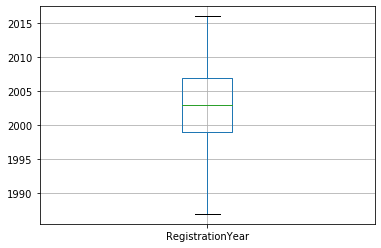

In [15]:
data_for_learn.boxplot(column=['RegistrationYear'])

In [16]:
data_for_learn.RegistrationYear.describe()

count    333097.000000
mean       2003.021985
std           5.787893
min        1987.000000
25%        1999.000000
50%        2003.000000
75%        2007.000000
max        2016.000000
Name: RegistrationYear, dtype: float64

Выбросы по этому признаку теперь отсутсвуют

Добавим новый столбец который будет обозначть возраст машины

In [17]:
data_for_learn['DateCreated']-data_for_learn['RegistrationYear']

0         23.0
1          5.0
2         12.0
3         15.0
4          8.0
          ... 
354364    11.0
354365    11.0
354366    16.0
354367    20.0
354368    14.0
Length: 347627, dtype: float64

In [18]:
data_for_learn['age']=(data_for_learn['DateCreated']
                       -data_for_learn['RegistrationYear'])



In [19]:
data_for_learn['age']

0         23.0
1          5.0
2         12.0
3         15.0
4          8.0
          ... 
354364    11.0
354365    11.0
354366    16.0
354367    20.0
354368    14.0
Name: age, Length: 347627, dtype: float64

Как и говорилось выше удалим столбцы RegistrationYear DateCreated, так как они теперь не нужны

In [20]:
data_for_learn.drop(['RegistrationYear','DateCreated'],axis=1,inplace=True)

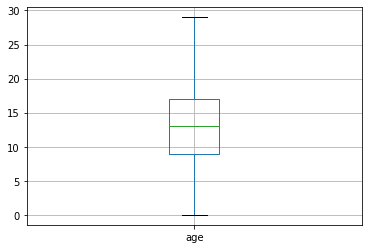

In [21]:
data_for_learn.boxplot(column=['age'])

На диаграмме размаха по столбцу возраст также видно, что выбросы отсутсвуют

### Дублирующие значения

Рассмотрим сколько дубликатов

In [22]:
data_for_learn.duplicated().sum()

44835

Удалим дубликаты

In [23]:
data_for_learn=data_for_learn.drop_duplicates().reset_index(drop=True)

### Обработка нулей

В исходном датасете явно присутвуют в целевом признкке значение 0. Бесплатно машина стоить не может, пожтому удалим все столюцы где цена равну нулю

In [24]:
data_for_learn=data_for_learn.query('Price!=0')

### обработка пропусков

В данном датасете явно присутвуют пропуски. Рассмотрим их подробнее

In [25]:
data_for_learn.isna().sum()

Price              0
VehicleType    30816
Gearbox        14401
Power              0
Model          15540
Kilometer          0
FuelType       26952
Brand              0
NotRepaired    58409
age            12816
dtype: int64

In [26]:
data_for_learn.head()

,Price,VehicleType,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired,age
0,480,NaN,manual,0,golf,150000,petrol,volkswagen,NaN,23.0
1,18300,coupe,manual,190,NaN,125000,gasoline,audi,yes,5.0
2,9800,suv,auto,163,grand,125000,gasoline,jeep,NaN,12.0
3,1500,small,manual,75,golf,150000,petrol,volkswagen,no,15.0
4,3600,small,manual,69,fabia,90000,gasoline,skoda,no,8.0


Рассмотрим столбец NotRepaired.

In [27]:
data_for_learn.NotRepaired

0         NaN
1         yes
2         NaN
3          no
4          no
         ... 
302786    yes
302788    NaN
302789     no
302790     no
302791    NaN
Name: NotRepaired, Length: 294422, dtype: object


Данный столбец отвечает за то что была ли машина в ремонте или нет. Так как пропусков достаточно и их удалять нельзя. Можно сделать вывод. Что если машина ремонтировлась, то владаелец это укажит точно, а если нет то он может пропустить, а может заполнить. Поэтому заполним все пропуски в столбце на yes

In [28]:
data_for_learn.NotRepaired.fillna('yes',inplace=True)

Разберемся с дальнейшими пропусками

Остальные столбцы в которых присутвуют пропуски являются значимыми фичами 


Удалим строки в которых отсувтуют сразу все значения, так как это является явным незаполнением данных и с такими данными работать не хорошо.

обозначим столбцы в которых пропущены значения

In [29]:
columns_with_none=['VehicleType','Gearbox','Model','FuelType','age']

удалим такие строки

In [30]:
data_for_learn.dropna(how='all', subset=columns_with_none,inplace=True)

Теперь помимо данных в которых отстувуют даннные во всех пропусках удалим так же, в которых присутвует только одно значение, а во всех других пропуски

In [31]:
for i in columns_with_none:
    a=[]
    for j in columns_with_none:
        if i!=j:
            a.append(j)
    data_for_learn.dropna(how='all', 
                subset=a,inplace=True)

In [32]:
data_for_learn.isna().sum()

Price              0
VehicleType    28169
Gearbox        12508
Power              0
Model          13372
Kilometer          0
FuelType       24473
Brand              0
NotRepaired        0
age            11250
dtype: int64

Часть пропусков также обработана, однако остались теперь важные признаки, которые обрабатывать стоит максимально аккуратно.

Рассмотрим признак VehicleType

Рассмотрим какие есть уникальные значения

In [33]:
data_for_learn.VehicleType.unique()

array([nan, 'coupe', 'suv', 'small', 'sedan', 'convertible', 'bus',
       'wagon', 'other'], dtype=object)

Можно предположить, что если клиент не нашел тип своей машины или не знает, то он выбереи либо другое либо пропуск, поэтому заменим все занчения в столбце VehicleType на other

In [34]:
data_for_learn.VehicleType.fillna('other',inplace=True)

Рассмотрим признак model на уникальные значения

In [35]:
data_for_learn.Model.unique()

array(['golf', nan, 'grand', 'fabia', '3er', '2_reihe', 'c_max',
       '3_reihe', 'passat', 'navara', 'polo', 'twingo', 'a_klasse',
       'scirocco', '5er', 'meriva', 'arosa', 'other', 'c4', 'civic',
       'punto', 'e_klasse', 'clio', 'kadett', 'kangoo', 'one', 'fortwo',
       '1er', 'b_klasse', 'signum', 'astra', 'a8', 'jetta', 'fiesta',
       'c_klasse', 'micra', 'vito', 'sprinter', '156', 'escort',
       'forester', 'xc_reihe', 'scenic', 'a4', 'ka', 'a1', 'insignia',
       'transporter', 'combo', 'focus', 'tt', 'corsa', 'a6', 'jazz',
       'omega', 'slk', '7er', '80', '147', 'z_reihe', 'sportage',
       'sorento', 'v40', 'ibiza', 'mustang', 'eos', 'touran', 'getz',
       'a3', 'almera', 'megane', 'lupo', 'r19', 'zafira', 'mondeo',
       'cordoba', 'colt', 'impreza', 'vectra', 'berlingo', 'tiguan',
       'i_reihe', 'espace', 'sharan', '6_reihe', 'panda', 'up',
       'seicento', 'ceed', '5_reihe', 'yeti', 'octavia', 'mii',
       'rx_reihe', 'modus', 'fox', 'matiz', 'beet

Заплнять Nan будем по наиболее часто повоторяющейся модели в бренде

In [36]:
brand=data_for_learn.Brand.unique()

In [37]:
dic_model={}
for i in brand:
    try:
        dic_model[i]=data_for_learn.query('Brand==@i').pivot_table(index='Model',values='Price',aggfunc='count').sort_values(by=['Price'],ascending=False).head(1).reset_index().loc[0,'Model']
    except:
        dic_model[i]='no_model' 

In [38]:
def change_model(row):
    model=row['Model']
    brand=row['Brand']
    if model!=model:
        model=dic_model[brand]
    return model   

In [39]:
data_for_learn['Model']=data_for_learn.apply(change_model,axis=1)

In [40]:
data_for_learn.isna().sum()

Price              0
VehicleType        0
Gearbox        12508
Power              0
Model              0
Kilometer          0
FuelType       24473
Brand              0
NotRepaired        0
age            11250
dtype: int64

Тоже самое проведем и для столбца GearBox

In [41]:
dic_for_GearBox={}
for i in brand:
    #model=[]
    model=data_for_learn.query('Brand==@i')['Model'].unique()
    dic={}
    for j in model:
        gear_box=data_for_learn.query('(Brand==@i) & (Model==@j)').pivot_table(index='Gearbox',values='Price',aggfunc='count').sort_values(by=['Price'],ascending=False).head(1).reset_index().loc[0,'Gearbox']
        dic[j]=gear_box
        dic_for_GearBox[i]=dic

In [42]:
def change_gearbox(row):
    model=row['Model']
    brand=row['Brand']
    gear_box=row['Gearbox']
    if gear_box!=gear_box:
        gear_box=dic_for_GearBox[brand][model]
    return gear_box   

In [43]:
data_for_learn['Gearbox']=data_for_learn.apply(change_gearbox,axis=1)

Проведем тоже самое для FuelType

In [44]:
dic_for_FuelType={}
for i in brand:
    #model=[]
    model=data_for_learn.query('Brand==@i')['Model'].unique()
    dic={}
    for j in model:
        FT=data_for_learn.query('(Brand==@i) & (Model==@j)').pivot_table(index='FuelType',values='Price',aggfunc='count').sort_values(by=['Price'],ascending=False).head(1).reset_index().loc[0,'FuelType']
        dic[j]=FT
        dic_for_FuelType[i]=dic

In [45]:
def change_fuelType(row):
    model=row['Model']
    brand=row['Brand']
    fueltype=row['FuelType']
    if fueltype!=fueltype:
        fueltype=dic_for_FuelType[brand][model]
    return fueltype   

In [46]:
data_for_learn['FuelType']=data_for_learn.apply(change_fuelType,axis=1)

Тоже самое поступим с возрастом машины только заполнять будем медианой

In [47]:
dic_for_age={}
for i in brand:
    #model=[]
    model=data_for_learn.query('Brand==@i')['Model'].unique()
    dic={}
    for j in model:
        
        Ag=data_for_learn.query('(Brand==@i) & (Model==@j)')['age'].median()
        dic[j]=Ag
        dic_for_age[i]=dic

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [48]:
def change_age(row):
    model=row['Model']
    brand=row['Brand']
    AG=row['age']
    if AG!=AG:
        AG=dic_for_age[brand][model]
    return AG   

In [49]:
data_for_learn['age']=data_for_learn.apply(change_age,axis=1)

In [50]:
data_for_learn.isna().sum()

Price          0
VehicleType    0
Gearbox        0
Power          0
Model          0
Kilometer      0
FuelType       0
Brand          0
NotRepaired    0
age            1
dtype: int64

присутвет один пропуск, удалим его

In [51]:
data_for_learn.dropna(subset=['age'],inplace=True)

И приведем все индексы в порядок

In [52]:
data_for_learn.reset_index(inplace=True)

### Коррекция типов данных

Рассмотрим какие типы данных присутсвуют внашем датасете

In [53]:
data_for_learn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291774 entries, 0 to 291773
Data columns (total 11 columns):
index          291774 non-null int64
Price          291774 non-null int64
VehicleType    291774 non-null object
Gearbox        291774 non-null object
Power          291774 non-null int64
Model          291774 non-null object
Kilometer      291774 non-null int64
FuelType       291774 non-null object
Brand          291774 non-null object
NotRepaired    291774 non-null object
age            291774 non-null float64
dtypes: float64(1), int64(4), object(6)
memory usage: 24.5+ MB


Все данные хорошо отредактированы необходимо только исправить столбце age и привести его к типу int

In [54]:
data_for_learn.age=data_for_learn.age.astype(int)

### Кодирование данных

Стоит отметить,  что среди всего датасета присутвуют категорилаьные данные, поэтому пока кодировать их не будем, но запишем их в отдельную строку

In [55]:
category=list(data_for_learn.loc[:,data_for_learn.dtypes=='object'].columns.values)
category

['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']

## Обучение моделей

### подготовка к обучению

отделим в данных целевой признак и фичи

In [56]:
target=data_for_learn['Price']
features=data_for_learn.drop('Price',axis=1)

Разобъем на тестовую и обчуающую выборку

In [57]:
features_train, features_test, target_train, target_test = (train_test_split(
    features, target, test_size=0.25, random_state=12345))

Создадим функцию которая будет подбирать параметры

In [58]:
def search_model(model,param,features,target):
    clf=GridSearchCV(model,param,cv=5,scoring=make_scorer(mean_squared_error,greater_is_better=False))
    clf.fit(features,target);
    best_result=clf.best_score_
    best_model=clf.best_estimator_
    return best_model,best_result

Для обучения случайным лесом не подойдут категориальные значения не числовые, поэтому необходимо их закордировать техникой порядкового кодирования

In [59]:

encoder = OrdinalEncoder()
data_ordinal = pd.DataFrame(encoder.fit_transform(data_for_learn.loc[:,category]),
                            columns=data_for_learn.loc[:,category].columns)


In [60]:
data_for_learn_coding=pd.concat([data_for_learn.loc[:,['Price','Power','Kilometer','age']],data_ordinal],axis=1)

Отделем целевой признак

In [61]:
target_code=data_for_learn_coding['Price']
features_code=data_for_learn_coding.drop('Price',axis=1)

Разобъем на тестовую и обучающую выборку кодированные данные

In [62]:
features_code_train, features_code_test, target_code_train, target_code_test = (train_test_split(
    features_code, target_code, test_size=0.25, random_state=12345))

In [63]:
features_code_train.head(2)

,Power,Kilometer,age,VehicleType,Gearbox,Model,FuelType,Brand,NotRepaired
18008,105,80000,8,7.0,1.0,101.0,6.0,31.0,1.0
97919,75,150000,16,5.0,1.0,103.0,6.0,10.0,0.0


In [64]:
target_code_train.head(2)

18008    7200
97919     750
Name: Price, dtype: int64

### Обучение линейной регрессией

Рассмотрим линейную регрессию

In [65]:
start=timeit.default_timer()
model=LinearRegression()
param={}
LinearRegression_model,LinearRegression_result=search_model(
    model,
    param,
    features_code_train,target_code_train
)
Time=timeit.default_timer()-start
LinearRegression_result

-10872490.650710138

In [66]:
train_table=pd.DataFrame(columns=['модель','время','RMSE'])

In [67]:
train_table=train_table.append({'модель':'линеная регрессия','время':Time,'RMSE':abs(LinearRegression_result)**0.5},ignore_index=True)

### Обучение случайным лесом

In [68]:
start=timeit.default_timer()
model=RandomForestRegressor(random_state=12345)
param={'n_estimators':range(1,40,10),'max_depth':(10,50,1)}
forest_model,forest_result=search_model(
    model,
    param,
    features_code_train,target_code_train
)
Time=timeit.default_timer()-start
abs(forest_result)**0.5

1740.4413764117116

In [69]:
train_table=train_table.append({'модель':'случайный лес','время':Time,'RMSE':abs(forest_result)**0.5},ignore_index=True)

### обучение CatBoost

В библиотеки catboost нет необходимости заранее кодировать категорилаьные данные. Достаточно перечислить их в атрибуте cat_features

In [70]:
start=timeit.default_timer()
model = CatBoostRegressor(loss_function="RMSE", iterations=500)
cat_features=['VehicleType', 'Gearbox','Model','FuelType','Brand','NotRepaired']
model.fit(features_train, target_train,cat_features=cat_features,verbose=100) 
Time=timeit.default_timer()-start

0:	learn: 4465.6124047	total: 766ms	remaining: 6m 22s
100:	learn: 1991.9922630	total: 1m 2s	remaining: 4m 5s
200:	learn: 1846.4847885	total: 2m 2s	remaining: 3m 2s
300:	learn: 1788.8632049	total: 3m 1s	remaining: 1m 59s
400:	learn: 1753.4767037	total: 3m 59s	remaining: 59.1s
499:	learn: 1729.1004027	total: 4m 58s	remaining: 0us


In [71]:
train_table=train_table.append({'модель':'catboost','время':Time,'RMSE':model.best_score_['learn']['RMSE']},ignore_index=True)

In [72]:
train_table

,модель,время,RMSE
0,линеная регрессия,1.088051,3297.346001
1,случайный лес,318.338332,1740.441376
2,catboost,302.054998,1729.100403


### обучение lgbLight

In [73]:
feature_train_lgb=features_train
feature_test_lgb=features_test
for feature in category:
    feature_train_lgb[feature]=pd.Series(feature_train_lgb[feature], dtype="category")
    feature_test_lgb[feature]=pd.Series(feature_test_lgb[feature], dtype="category")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [74]:
start=timeit.default_timer()
hyper_params={
    'task':'train',
    'objective':'regression',
    'metric':'rmse',
    'learning_rate':0.5,
}
lgb_train=lgb.Dataset(feature_train_lgb,target_train)
gbm=lgb.train(hyper_params,lgb_train,num_boost_round=10,verbose_eval=False)
gbm
Time=timeit.default_timer()-start

In [75]:
train_table=train_table.append({'модель':'lgblight','время':Time,'RMSE':mean_squared_error(target_train,gbm.predict(feature_train_lgb))**0.5},ignore_index=True)

### Итог обучения

In [76]:
train_table

,модель,время,RMSE
0,линеная регрессия,1.088051,3297.346001
1,случайный лес,318.338332,1740.441376
2,catboost,302.054998,1729.100403
3,lgblight,2.356131,1750.329443


Таким образом наиболее точное оучение произошло моделью catboost, однако на это около 5 минут, у lgblight значение метрики примерно такое же, но обучене длило 2 сек.
Рассмотрим как поведут данные модели на тестовых данных

## Анализ моделей

Создадим сводную таблицу по нашим моделям

In [77]:
def check_RMSE(model,target,features):
    start=timeit.default_timer()
    pred=model.predict(features)
    Time=timeit.default_timer()-start
    return mean_squared_error(target,pred)**0.5,Time

In [78]:
test_table=pd.DataFrame(columns=['модель','время предсказания','RMSE'])

In [79]:
test_table=test_table.append({'модель':'линеная регрессия',
                               'время предсказания':check_RMSE(LinearRegression_model,target_code_test,features_code_test)[1],
                               'RMSE':check_RMSE(LinearRegression_model,target_code_test,features_code_test)[0]},ignore_index=True)

In [80]:
test_table=test_table.append({'модель':'случайный лес',
                               'время предсказания':check_RMSE(forest_model,target_code_test,features_code_test)[1],
                               'RMSE':check_RMSE(forest_model,target_code_test,features_code_test)[0]},ignore_index=True)

In [81]:
test_table=test_table.append({'модель':'catboost',
                               'время предсказания':check_RMSE(model,target_test,features_test)[1],
                               'RMSE':check_RMSE(model,target_test,features_test)[0]},ignore_index=True)

In [82]:
test_table=test_table.append({'модель':'lgblight',
                               'время предсказания':check_RMSE(gbm,target_test,feature_test_lgb)[1],
                               'RMSE':check_RMSE(gbm,target_test,feature_test_lgb)[0]},ignore_index=True)

In [83]:

test_table['время обучения']=train_table['время']


In [84]:
test_table

,модель,время предсказания,RMSE,время обучения
0,линеная регрессия,0.017524,3287.341169,1.088051
1,случайный лес,1.283861,1711.406495,318.338332
2,catboost,0.391603,1734.065986,302.054998
3,lgblight,0.092973,1784.732876,2.356131


## Вывод

Работа проводилась в несколлько этапов. На первом этапе был обработан сам исходный датафрейм. В результате обработки пришлось очистить около 18 процентов данных, так как эти данные содержали пропуски по большинству важных фич и замене не подлежали. Также исходный датасет содержал и дублирующие значения. 

Из оставшегося датафрефма около 10 процетов объектов содержали пропуски по одной или нескольких фич. Данные пропуски были обработаны по макимально популярными признаками исходя из брэнда и модели.

Также стоит отметить, что для предсказания был введен еще один признак как возраст авто, так как сами по себе признаки из исходного датафрема(Год регистрации и год подачи объявления) не несли в себе что то важное.

Для обучения исполльзовались модели линейной регрессии, случайного леса, модели градиетного бустинга на библиотеках catboost и lgblight. В качестве метрики использовалась RMSE.

В результате обучения необходимое значение метрики достигли 3 модели: случайный лес, градиентный бустинг. Значение метрики у таких моделей примерно одинаковое и равно 1720, однако на обучение случаного леса и библиотекой catboost потребовалось около 5 минут, а библиотекой lgblight намного меньше.

Проверка на тестовой выборке подвердила заначения и выбор модели.

Таким образом исходя из ТЗ выбрана модель обучения градиентным бустингом библиотекой lgblight